In [1]:
!pip install keras-unet-collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import tensorflow as tf
# import tensorflow_models as tfm
import glob

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
print(os.getenv('TF_GPU_ALLOCATOR'))

cuda_malloc_async


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
# image_directory = '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/VGG_features/*'
image_directory = '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/PNGImages/*'
mask_directory = '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/SegmentationClassPNG/*'

In [7]:
image_names = glob.glob(image_directory)
image_names

['/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-40-16.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-46-08.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_14-01-57.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-41-20.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-34-08.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-24-44.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-42-34.png',
 '/content/drive/MyDrive/Colab Notebooks/

In [8]:
mask_names = glob.glob(mask_directory)
mask_names

['/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-27-49.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_14-01-42.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-25-46.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-25-24.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-27-53.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_14-01-50.png',
 '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/Segmentatio

In [9]:
# mask_names = np.repeat(np.array(mask_names), 64, axis=0)

image_names.sort()
mask_names.sort()

# image_names = np.array(image_names)
# mask_names = np.array(mask_names)

# shuffle = np.random.permutation(len(image_names))
# image_names = image_names[shuffle]
# mask_names = mask_names[shuffle]

In [10]:
images = [cv2.imread(img, 0) for img in image_names]
# images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
# images = [cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA) for img in images]
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis=3)

In [11]:
masks = [cv2.imread(mask, 0) for mask in mask_names]
# masks = [cv2.resize(mask, (256, 256), interpolation = cv2.INTER_AREA) for mask in masks]
# mask_dataset = np.array([np.repeat([mask], 64) for mask in masks])
# mask_dataset = np.repeat(np.array(masks), 64, axis=0)
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis=3)

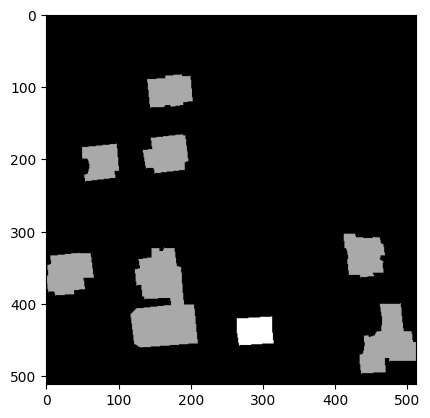

In [12]:
plt.imshow(mask_dataset[12, :, :, 0], cmap='gray')


In [13]:
# mask_labels = np.unique(mask_dataset)
# for mask in mask_dataset:
#     for i, val in enumerate(mask_labels):
#         mask[mask == val] = i
# print("Labels in the mask are : ", np.unique(mask_dataset))

In [14]:
#binary segmentation
for mask in mask_dataset:
    mask[mask > 0] = 1
# print("Labels in the mask are : ", np.unique(mask_dataset))

In [15]:
# image_dataset = image_dataset / 255.
image_dataset = image_dataset.astype('float16')
for i in range(0, image_dataset.shape[0]):
    image_dataset[i] /= 255.
    # mask_dataset[i] = mask_dataset[i]/255.
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


In [16]:
print(image_dataset.shape)
print(mask_dataset.shape)

(124, 512, 512, 1)
(124, 512, 512, 1)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.25, random_state=42)

# test_size=0.15
# dataset_size = image_dataset.shape[0]

# X_train, X_test = image_dataset[:int(dataset_size*(1-test_size))], image_dataset[int(dataset_size*(1-test_size)):]
# y_train, y_test = mask_dataset[:int(dataset_size*(1-test_size))], mask_dataset[int(dataset_size*(1-test_size)):]

print(f"X_train: {X_train.shape}\t X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}\t y_test: {y_test.shape}")

X_train: (93, 512, 512, 1)	 X_test: (31, 512, 512, 1)
y_train: (93, 512, 512, 1)	 y_test: (31, 512, 512, 1)


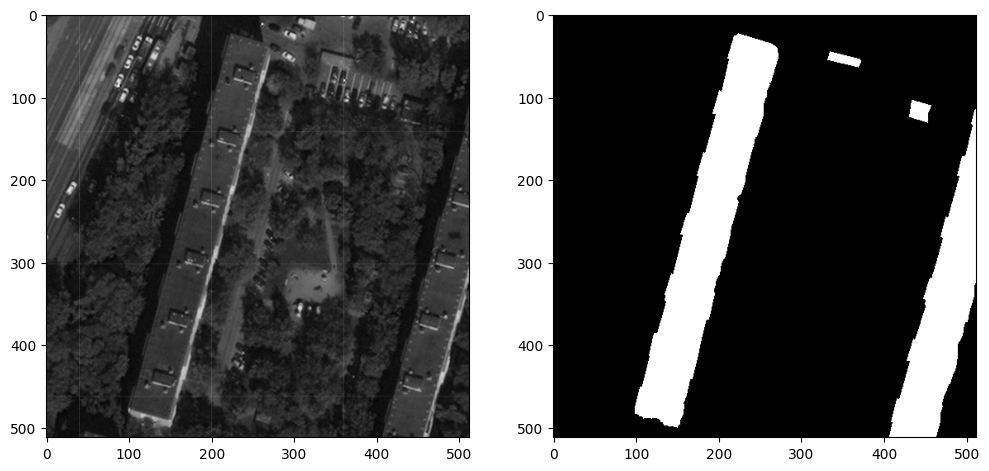

In [18]:
import random 

image_number = random.randint(0, len(X_train) - 1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number, :, :], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number, :, :], cmap='gray')
plt.show()

In [19]:
#New generator with rotation and shear where interpolation that comes with rotation and shear are thresholded in masks.
#This gives a binary mask rather than a mask with interpolated values.
seed=24
from keras.preprocessing.image import ImageDataGenerator

img_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

mask_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect',
                     preprocessing_function = lambda x: np.where(x>0, 1, 0).astype(x.dtype)) #Binarize the output again.

In [20]:
image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_data_generator.fit(X_train, augment=True, seed=seed)

In [21]:
mask_data_generator = ImageDataGenerator(**mask_data_gen_args)
mask_data_generator.fit(y_train, augment=True, seed=seed)

In [22]:
# def my_image_mask_generator(image_generator, mask_generator):
#     train_generator = zip(image_generator, mask_generator)
#     for (img, mask) in train_generator:
#         yield (img, mask)

# my_generator = my_image_mask_generator(image_generator, mask_generator)

In [23]:
# validation_datagen = my_image_mask_generator(valid_img_generator, valid_mask_generator)

In [24]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)

In [25]:
from keras_unet_collection import models, losses

In [26]:
help(models.unet_3plus_2d)

Help on function unet_3plus_2d in module keras_unet_collection._model_unet_3plus_2d:

unet_3plus_2d(input_size, n_labels, filter_num_down, filter_num_skip='auto', filter_num_aggregate='auto', stack_num_down=2, stack_num_up=1, activation='ReLU', output_activation='Sigmoid', batch_norm=False, pool=True, unpool=True, deep_supervision=False, backbone=None, weights='imagenet', freeze_backbone=True, freeze_batch_norm=True, name='unet3plus')
    UNET 3+ with an optional ImageNet-trained backbone.
    
    unet_3plus_2d(input_size, n_labels, filter_num_down, filter_num_skip='auto', filter_num_aggregate='auto', 
                  stack_num_down=2, stack_num_up=1, activation='ReLU', output_activation='Sigmoid',
                  batch_norm=False, pool=True, unpool=True, deep_supervision=False, 
                  backbone=None, weights='imagenet', freeze_backbone=True, freeze_batch_norm=True, name='unet3plus')
                  
    ----------
    Huang, H., Lin, L., Tong, R., Hu, H., Zhang, Q., 

In [27]:
from keras_unet_collection import losses

def hybrid_loss(y_true, y_pred):

    loss_focal = losses.focal_tversky(y_true, y_pred, alpha=0.5, gamma=4/3)
    loss_iou = losses.iou_seg(y_true, y_pred)
    
    # (x) 
    #loss_ssim = losses.ms_ssim(y_true, y_pred, max_val=1.0, filter_size=4)
    
    return loss_focal+loss_iou #+loss_ssim

In [28]:
unet3plus = models.unet_3plus_2d(input_shape,
                                 filter_num_down=[64, 128, 256, 512, 1024], 
                                 filter_num_skip=[32, 32, 32, 32],
                                 n_labels=2, 
                                 stack_num_down=2, stack_num_up=1, 
                                 activation='ReLU', 
                                 output_activation='Sigmoid', 
                                 batch_norm=True, pool=True, unpool=True, 
                                 backbone=None, # weights='imagenet', 
                                 freeze_backbone=True, freeze_batch_norm=False, 
                                 deep_supervision=True,
                                 name='unet3plus')

Automated hyper-parameter determination is applied with the following details:
----------
	Number of convolution filters after each full-scale skip connection: filter_num_skip = [32, 32, 32, 32]
	Number of channels of full-scale aggregated feature maps: filter_num_aggregate = 320
----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	unet3plus_output_sup0_activation
	unet3plus_output_sup1_activation
	unet3plus_output_sup2_activation
	unet3plus_output_sup3_activation
	unet3plus_output_final_activation


In [29]:
unet3plus.compile(loss=[hybrid_loss, hybrid_loss, hybrid_loss, hybrid_loss, hybrid_loss],
                  loss_weights=[0.25, 0.25, 0.25, 0.25, 1.0],
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))

In [30]:
N_EPOCH = 1000 # number of epoches
N_BATCH = 200 # number of batches per epoch
N_SAMPLE = 2 # number of samples per batch
TEST_SIZE = 100

In [31]:
train_img_generator = image_data_generator.flow(X_train, seed=seed, batch_size=N_SAMPLE)
test_img_generator = image_data_generator.flow(X_test, seed=seed, batch_size=TEST_SIZE)
train_mask_generator = mask_data_generator.flow(y_train, seed=seed, batch_size=N_SAMPLE)
test_mask_generator = mask_data_generator.flow(y_test, seed=seed, batch_size=TEST_SIZE)

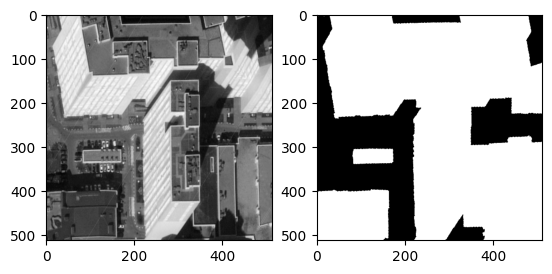

In [32]:
x = train_img_generator.next()
y = train_mask_generator.next()
for i in range(0,1):
    image = x[i]
    mask = y[i]
    plt.subplot(1,2,1)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask[:,:,0], cmap='gray')
    plt.show()

In [ ]:
SAVE_PATH = "/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/saved_models/checkpoints/unet3plus/weights_aug.hdf5"

TOL = 0 # current early stopping patience
MAX_TOL = 20 # the max-allowed early stopping patience
DELTA = 0 # the lowest acceptable loss value reduction 

# loop over epoches
for epoch in range(N_EPOCH):
    valid_input = test_img_generator.next()
    valid_target = test_mask_generator.next()

    # initial loss record
    if epoch == 0:
        temp_out = unet3plus.predict([X_test])
        y_pred = temp_out[-1]
        record = np.mean(hybrid_loss(y_test, y_pred))
        print('\tInitial loss = {}'.format(record))
    
    # loop over batches
    for step in range(N_BATCH):        
        # batch data formation
        ## augmentation is not applied
        train_input = train_img_generator.next()
        train_target = train_mask_generator.next()
        
        # train on batch
        loss_ = unet3plus.train_on_batch([train_input,], 
                                         [train_target, train_target, train_target, train_target, train_target,])
#         if np.isnan(loss_):
#             print("Training blow-up")

        # ** training loss is not stored ** #
        
    # epoch-end validation
    temp_out = unet3plus.predict([valid_input])
    y_pred = temp_out[-1]
    record_temp = np.mean(hybrid_loss(valid_target, y_pred))
    # ** validation loss is not stored ** #
    
    # if loss is reduced
    if record - record_temp > DELTA:
        print('Validation performance is improved from {} to {}'.format(record, record_temp))
        record = record_temp; # update the loss record
        tol = 0; # refresh early stopping patience
        unet3plus.save_weights(SAVE_PATH)
        # ** model checkpoint is not stored ** #

    # if loss not reduced
    else:
        print('Validation performance {} is NOT improved'.format(record_temp))
        tol += 1
        if tol >= MAX_TOL:
            print('Early stopping')
            break;
        else:
            # Pass to the next epoch
            continue;